In [1]:
%cd "../"

/home/akali/projects/model-trainer


In [2]:
import importlib
import logging

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from generic_iterative_stemmer.utils import get_path, loader, configure_logging

configure_logging()
log = logging.getLogger(__name__)
importlib.reload(loader)

[00:14:26] Logging configured [generic_iterative_stemmer.utils.logging]


<module 'generic_iterative_stemmer.utils.loader' from '/home/akali/projects/model-trainer/generic_iterative_stemmer/utils/loader.py'>

In [4]:
corpus_name = "wiki-he-200"
cbow_path = get_path(corpus_name, "cbow.kv")
cbow_model = loader.load_kv(cbow_path)

ft_path = get_path(corpus_name, "fasttext.kv")
ft_model = loader.load_kv(ft_path)

sg_path = get_path(corpus_name, "sg.kv")
sg_model = loader.load_kv(sg_path)

[01:38:43] loading KeyedVectors object from ./data/wiki-he-200/cbow.kv [gensim.utils]
[01:38:44] loading vectors from ./data/wiki-he-200/cbow.kv.vectors.npy with mmap=None [gensim.utils]
[01:38:45] KeyedVectors lifecycle event {'fname': './data/wiki-he-200/cbow.kv', 'datetime': '2022-01-23T01:38:45.441535', 'gensim': '4.1.2', 'python': '3.8.10 (default, Sep 28 2021, 16:10:42) \n[GCC 9.3.0]', 'platform': 'Linux-5.11.0-40-generic-x86_64-with-glibc2.29', 'event': 'loaded'} [gensim.utils]
[01:38:45] Vectors loaded [generic_iterative_stemmer.utils.loader]
[01:38:45] loading KeyedVectors object from ./data/wiki-he-200/sg.kv [gensim.utils]


FileNotFoundError: [Errno 2] No such file or directory: './data/wiki-he-200/sg.kv'

In [6]:
cbow_vocab = set(cbow_model.key_to_index.keys())
sg_vocab = set(sg_model.key_to_index.keys())
ft_vocab = set(ft_model.key_to_index.keys())
common_vocab = cbow_vocab.intersection(sg_vocab).intersection(ft_vocab)

s1, s2, s3 = len(cbow_vocab), len(sg_vocab), len(ft_vocab)
print(f"Common vocab: {len(common_vocab)}")

NameError: name 'sg_model' is not defined

In [7]:
import random

representative = "אקדח"  # random.sample(common_vocab, k=1)[0]
print(f"Representative: {representative}")

others_count = 10000
random.seed(3)
others = random.sample(common_vocab, k=others_count)
print(f"Others: {others}")

Representative: אקדח
Others: ['הכפויות', 'כשעיר', 'שמגלימ', 'כמנור', 'התהוותו', 'להתפלספ', 'הליצנ', 'קראדוק', 'קיסמאיו', 'בליטורגיה', 'מפולגת', 'שאנואנ', 'והמשא', 'כל-אחת', 'שסינסטרו', 'ברגה', 'ברנאו', 'מהמכונ', 'כאידיל', 'פלסנטייה', 'שבאתיופיה', 'כשעזרה', "הורונצ'יק", 'ומוקדשות', 'שמחליטה', 'סנאפס', 'האונדטרה', 'קריאותיו', "עקיבא'", "צ'אגואנס", 'אורתודוכסימ', 'מתצלומימ', 'בורגנדי', 'הקלאסיציסטי', 'פאדוס', 'מהתסיסה', 'ארגאווי', 'ידעטק', 'ורגילימ', 'ריססו', 'אוסטרו-אסיאתיות', 'מאופק', 'שמוזי', 'שהופקעו', 'זיהומ', 'בקוצר', 'טוויטר', 'שפיוטימ', 'לסונ', 'הורלבורט', 'יסופק', 'אינטרני', 'סטרייפ', 'קלעת', 'בברוש', "וג'וזפינ", 'בגופייה', 'והגוש', 'תדרש', 'וטקסונומיה', 'טרסטניאק', 'הרץ-לזרוביצ', 'קופפר-תובל', 'משולשל', 'ונערכימ', 'טוריאמה', 'פורמליסטיות', 'מיושביהנ', 'רפורמיות', 'ולבריטניה', 'לבסרביה', 'אספנו', 'השאיל', 'פיגארואה', 'בהפחתה', 'שטיפולי', 'טינקלר', 'בלוך-לנדאו', 'ובהירותו', 'והמגנטיימ', 'מטויחות', 'כנשיא', 'במחדלימ', 'במאמציה', 'לאאוגסבורג', 'דה-פרייטס', 'מיקרופלואידיקה', 'מחגיגות

In [10]:
from typing import List
from gensim.models import KeyedVectors


def representative_distances(model: KeyedVectors, representative: str, others: List[str]) -> np.ndarray:
    return model.distances(representative, other_words=others)


cbow_distances = representative_distances(cbow_model, representative, others)
sg_distances = representative_distances(sg_model, representative, others)
ft_distances = representative_distances(ft_model, representative, others)

NameError: name 'sg_model' is not defined

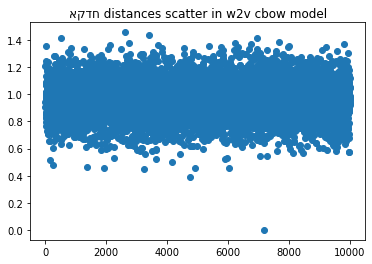

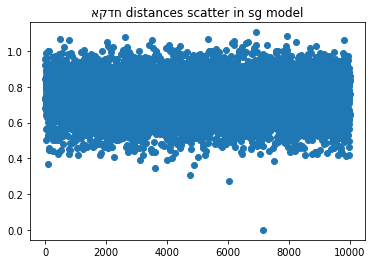

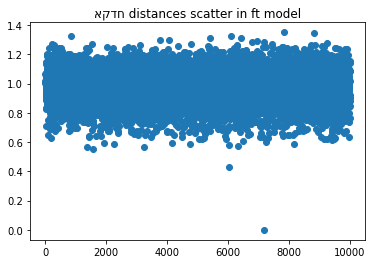

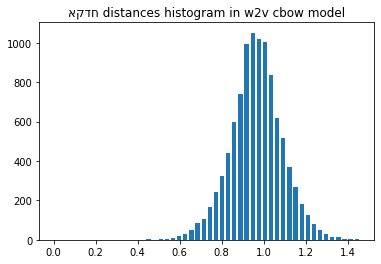

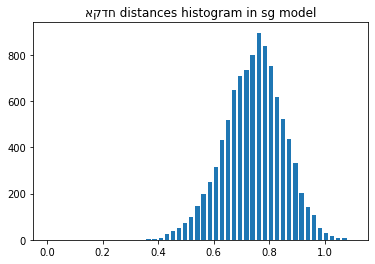

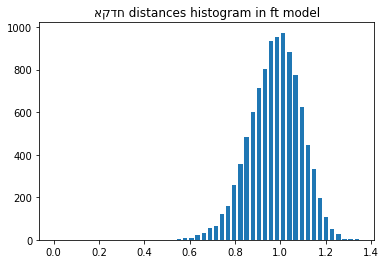

<Figure size 432x288 with 0 Axes>

In [9]:
def draw_distances_scatter(distances: np.ndarray, representative: str = None, model_name: str = None):
    x = np.arange(len(distances))
    plt.scatter(x, distances)
    if representative:
        title = f"{representative} distances scatter"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


def draw_distances_histogram(
    distances: np.ndarray,
    bins: int = None,
    representative: str = None,
    model_name: str = None,
):
    if bins is None:
        bins = min(int(len(distances) / 10), 50)
    plt.hist(distances, bins=bins, rwidth=0.7)
    if representative:
        title = f"{representative} distances histogram"
        if model_name:
            title += f" in {model_name} model"
        plt.title(title)
    plt.show()
    plt.clf()


draw_distances_scatter(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_scatter(sg_distances, representative=representative, model_name="sg")
draw_distances_scatter(ft_distances, representative=representative, model_name="ft")
draw_distances_histogram(cbow_distances, representative=representative, model_name="w2v cbow")
draw_distances_histogram(sg_distances, representative=representative, model_name="sg")
draw_distances_histogram(ft_distances, representative=representative, model_name="ft")

In [121]:
def edges(distances: np.ndarray, others: List[str], top_n: int = 15) -> List[str]:
    indexes = np.argsort(distances)[:top_n]
    return [others[i] for i in indexes]


print(f"For representative: {representative}")
edges1 = edges(cbow_distances, others=others)
edges2 = edges(sg_distances, others=others)
edges3 = edges(ft_distances, others=others)

df = pd.DataFrame()
df["w2v"] = edges1
df["sg"] = edges2
df["ft"] = edges3
df["q"] = "finito"

print(df)

For representative: אקדח
      w2v      sg     ft       q
0     כסף     רכב    רכב  finito
1     רכב    צבאי   כדור  finito
2    אותם    עליו    קול  finito
3    עצמו     כלי     יד  finito
4   השחקן     קול    כסף  finito
5    ממנו     כסף   הרכב  finito
6    כדור    אותם   עצמו  finito
7   בעזרת   בעזרת   אותם  finito
8     קול     אבל    דין  finito
9    עליו      יד    צבא  finito
10  במשחק    כדור  בעזרת  finito
11    סרט      צה   משחק  finito
12   משחק    ממנו  השחקן  finito
13    אני  חיילים    כוח  finito
14    קשר    מתחת    אני  finito


In [8]:
model = cbow_model
others = model.index_to_key[100:2000]

In [11]:
base_word = "גבר"
similarities: list = model.most_similar(base_word, topn=20)


def get_similarity(model, word):
    return word, model.similarity(base_word, word)


similarities.append(get_similarity(model, "קיפוד"))
similarities.append(get_similarity(model, "תפוח"))
similarities.append(get_similarity(model, "קילו"))
similarities.append(get_similarity(model, "פסיפס"))


def association_similarity(w1: str, w2: str, others):
    x1 = representative_distances(model, w1, others)
    x2 = representative_distances(model, w2, others)
    return (x1 @ x2) / len(others)


records = []
for similar_word, grade in similarities:
    association = association_similarity(base_word, similar_word, others)
    record = (f"x {similar_word} x", grade, association)
    records.append(record)

df = pd.DataFrame(data=records, columns=["word", "cosine_similarity", "association_similarity"])

print(df.sort_values("cosine_similarity", ascending=False))

              word  cosine_similarity  association_similarity
0         x לגבר x           0.581058                0.976372
1         x הגבר x           0.546293                0.965975
2         x אישה x           0.544530                0.961548
3          x נער x           0.526682                0.983158
4          x ילד x           0.523009                0.966041
5       x פדופיל x           0.522762                0.981386
6         x בגבר x           0.521310                0.992572
7        x כשגבר x           0.521130                0.995886
8         x זונה x           0.520522                0.967997
9         x בחור x           0.518977                0.983465
10        x כגבר x           0.518648                0.991194
11        x וגבר x           0.512792                1.004213
12        x ילוד x           0.503750                0.996873
13        x רווק x           0.484201                0.974668
14         x אשה x           0.483346                0.964025
15      